## Project Title: 
## *🛒 Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce*

## By Shubham Pandey

## Problem Type:
#### *●	Unsupervised Machine Learning – Clustering*
#### *●	Collaborative Filtering – Recommendation System*

## Problem Statement:
#### *The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors. Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth. This project aims to examine transaction data from an online retail business to uncover patterns in customer purchase behavior, segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and develop a product recommendation system using collaborative filtering techniques.*

## Git-hub Link:
#### *https://github.com/Shubhampandey1git/-Shopper-Spectrum-Customer-Segmentation-and-Product-Recommendations-in-E-Commerce*

# **Imports**

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics.pairwise import cosine_similarity

# **1. Dataset Collection and Understanding** 

***Loading the dataset; Checking the Top rows, data types, missing values and summary stats***

In [24]:
# Loading the dataset
df = pd.read_csv('online_retail.csv')

# Printing the top 5 rows
print(df.head())

# Getting the data types and missing values
print(df.info())

# Getting the summary stats
print(df.describe(include='all'))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       ------------

***Observations:***
1. Missing Customer IDs
2. Negative Quantity and UnitPrice
3. Some InvoiceNo start with 'C'
4. Date column is still a string

# **2. Data Preprocessing**

***Cleaning the data:***
1. Removing the rows with missing CustomerIDs
2. Removing canceled transactions
3. Removing negative or zero quantities and prices
4. Converting the InvoiceDate to datetime

In [25]:
# Removing the rows with missing CustomerID
df_clean = df.dropna(subset=['CustomerID'])

# Removing cancelled transactions  (InvoiceNos starting with 'C')
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

# Removing the rows with negative or zero quantity and prices
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

# Convert InvoiceDate to datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

***Checking for duplicates***

In [26]:
duplicates = df_clean.duplicated().sum()
print(f'Duplicate rows: {duplicates}')

Duplicate rows: 5192


***Removing the Duplicates***

In [27]:
df_clean = df_clean.drop_duplicates()

***Checking the final shape of the Data Frame***

In [28]:
print(df_clean.describe(include='all'))

       InvoiceNo StockCode                         Description       Quantity  \
count     392692    392692                              392692  392692.000000   
unique     18532      3665                                3877            NaN   
top       576339    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq         542      2023                                2016            NaN   
mean         NaN       NaN                                 NaN      13.119702   
min          NaN       NaN                                 NaN       1.000000   
25%          NaN       NaN                                 NaN       2.000000   
50%          NaN       NaN                                 NaN       6.000000   
75%          NaN       NaN                                 NaN      12.000000   
max          NaN       NaN                                 NaN   80995.000000   
std          NaN       NaN                                 NaN     180.492832   

                          I

# **3. EDA**

***1. Analyzing Transaction Volume by Country***

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16272\3525974157.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country.values, y=country.index, palette='cubehelix')


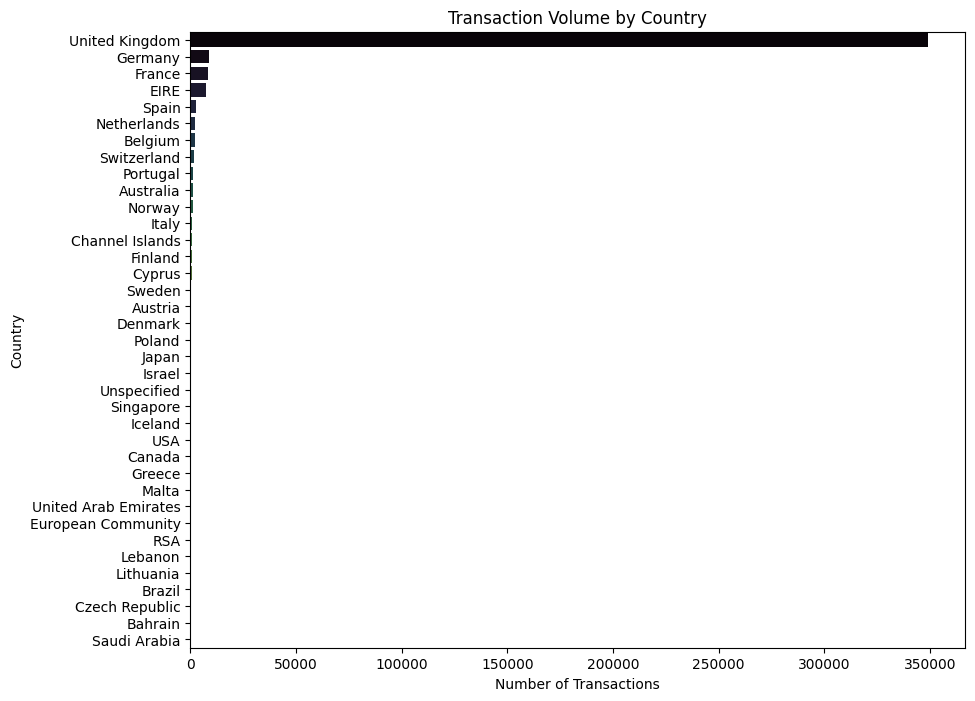

In [29]:
country = df_clean['Country'].value_counts()

plt.figure(figsize=(10,8))
sns.barplot(x=country.values, y=country.index, palette='cubehelix')
plt.title('Transaction Volume by Country')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.show()

***Observations:***
1. Most of the transactions occur in UK.
2. Very few transactions occur in most of the countries.

***2. Identify Top-Selling Products.***

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16272\3058560103.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='muted')


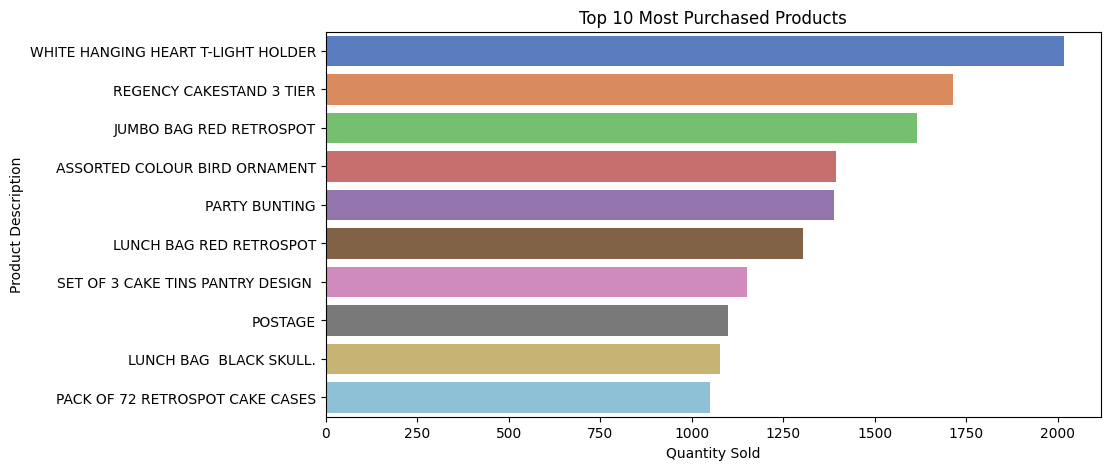

In [30]:
top_products = df_clean['Description'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='muted')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

***Observations:***

-> Most purchased Item is 'WHITE HANGING HEART T-LIGHT HOLDER'

***3. Purchase Trends Over Time***

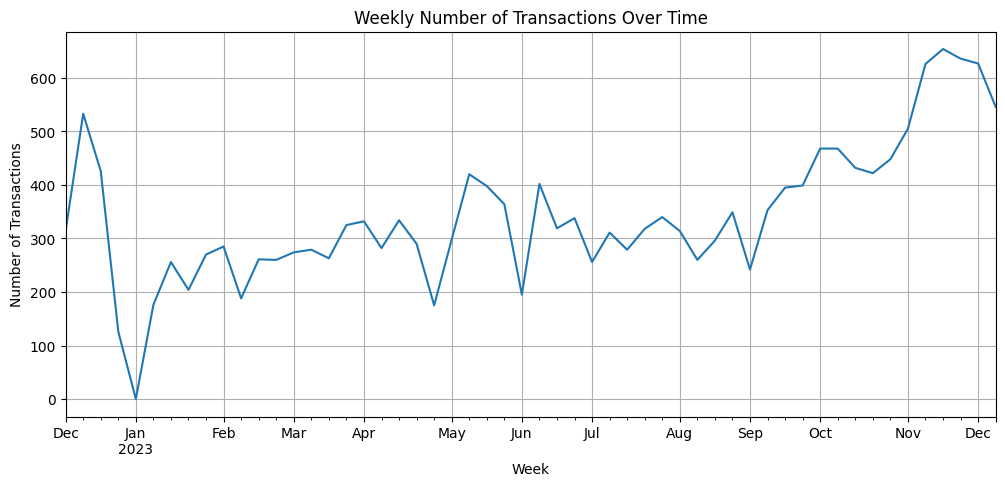

In [31]:
df_clean.set_index('InvoiceDate')['InvoiceNo'].resample('W').nunique().plot(figsize=(12,5))
plt.title('Weekly Number of Transactions Over Time')
plt.xlabel('Week')
plt.ylabel('Number of Transactions')
plt.grid()
plt.show()

***Observations:***
1. Most of the purchases were made between nov-dec and dec-jan, which is the 'holiday season'.
2. However, there is drop in sales start of jan.

***4. Monetary Distribution per Transaction***

In [36]:
# Creating the TransactionValue column
df_clean['TransactionValue'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [37]:
df_clean['TransactionValue'].describe()

count    392692.000000
mean         22.631500
std         311.099224
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: TransactionValue, dtype: float64

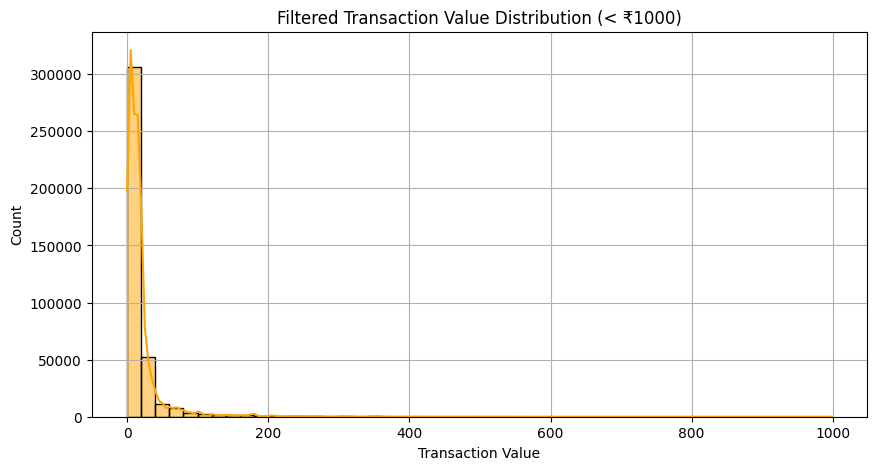

In [38]:
filtered = df_clean[df_clean['TransactionValue'] < 1000]

plt.figure(figsize=(10,5))
sns.histplot(filtered['TransactionValue'], bins=50, kde=True, color='orange')
plt.title('Filtered Transaction Value Distribution (< ₹1000)')
plt.xlabel('Transaction Value')
plt.ylabel('Count')
plt.grid()
plt.show()

***Observations:***
1. TransactionValue has too many out liers having major difference in max and the 75th percentile
2. We might need to remove these.

***5. Monetary Distribution per Customer***

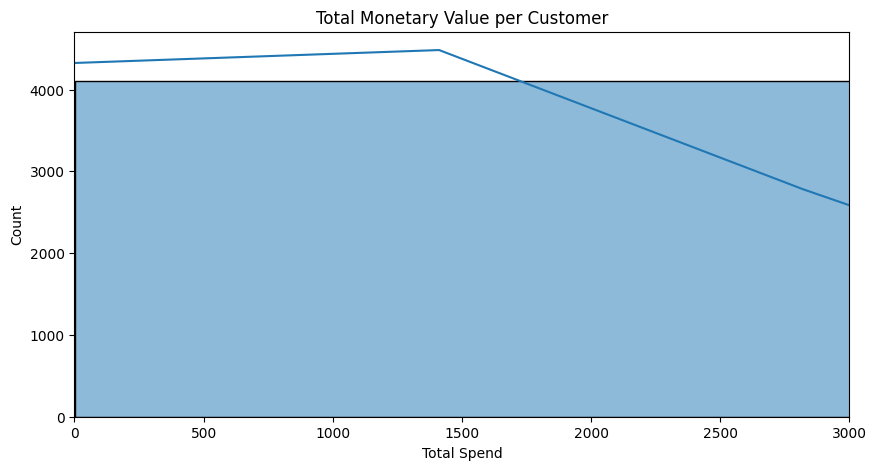

In [39]:
customer_monetary = df_clean.groupby('CustomerID')['TransactionValue'].sum()

plt.figure(figsize=(10,5))
sns.histplot(customer_monetary, bins=50, kde=True)
plt.title('Total Monetary Value per Customer')
plt.xlabel('Total Spend')
plt.xlim(0, 3000)
plt.show()


***Observations:***
1. Most customers spent less than 500 total
2. Only some customers spent between 1000 and 3000

***6. RFM(Recency, Frequency, Monetary) Distributions***

***Creating the RFM data frame***

In [41]:
# Set "today" as one day after last invoice date
today_date = df_clean['InvoiceDate'].max() + dt.timedelta(days=1)

# Group by CustomerID and calculate R, F, M
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                # Frequency
    'Quantity': 'sum',
    'UnitPrice': 'mean'
}).reset_index()

# Compute Monetary value
rfm['Monetary'] = rfm['Quantity'] * rfm['UnitPrice']

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency'
}, inplace=True)

***Plotting the RFM***

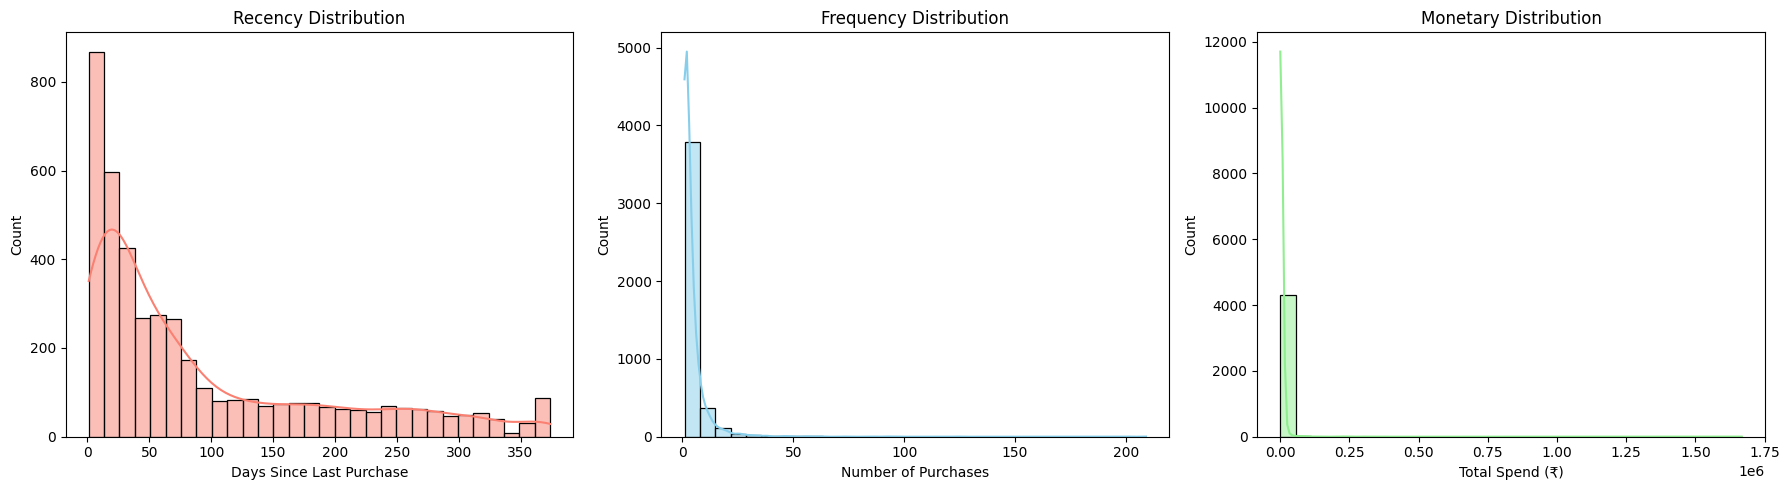

In [42]:
rfm = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary']]

# Plot Recency, Frequency, Monetary distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axes[0], color='salmon')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days Since Last Purchase')

sns.histplot(rfm['Frequency'], bins=30, kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of Purchases')

sns.histplot(rfm['Monetary'], bins=30, kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Total Spend (₹)')

plt.tight_layout()
plt.show()


***Observations:***

*1. Recency Distribution:*
* Most customers purchased recently(low recency = good)
* There are fewer customers as the recency increases, it means fewer people are inactive
* Its Right-skewed, which is good

*2. Frequency Distribution:*
* Most customers have 1 to 5 unique purchases
* A very small number of user made many purchases
* This skew will affect clustering, we will need to *normalize* it

*3. Monetary Distribution:*
* A few customers spend huge amounts, but the majority spend under 1000
* This is very right skewed and thus has massive outliers.
* We need to scale it before clustering

# **4. Clustering Methodology**

***1. Standardizing the RFM Features***

K-Means is sensitive to scale, so we need to use StandardScalar from scikit-learn to normalize the values.

In [45]:
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Initializing the scaler and fit-transform
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

***2. Using the Elbow Method to choose K***

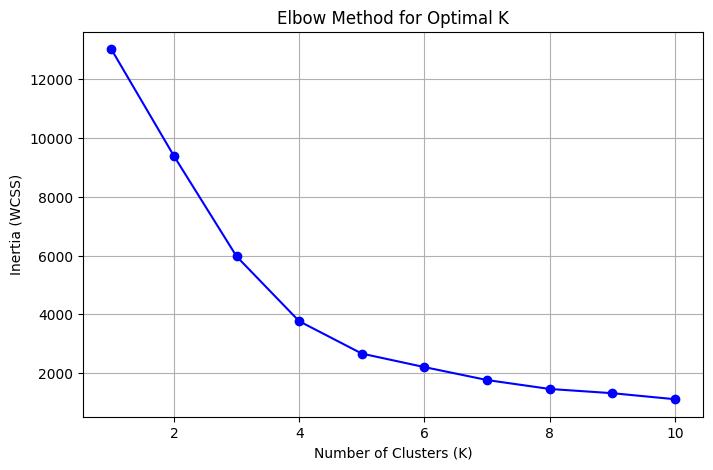

In [47]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

***Observations:***
1. We can observe the elbow at 5
2. So, out final K=5

***3. K-Means clustering with K=5***

In [ ]:
# Run KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(rfm_scaled)  # Fitting the model

# Assigning cluster labels to RFM data
rfm['Cluster'] = kmeans.labels_

# Previewing with clusters
print(rfm.groupby('Cluster').mean().round(2))

         CustomerID  Recency  Frequency    Monetary
Cluster                                            
0          15323.94    13.30      19.78    21256.93
1          15281.30    44.47       3.46     2244.97
2          14913.89     1.78     114.89   166097.10
3          17352.00    62.00      25.00  1362793.26
4          15345.42   248.59       1.57     1056.85


***4. Labeling the Segments***

In [50]:
cluster_labels = {
    0: 'High-Value',
    1: 'Regular',
    2: 'VIP',
    3: 'Anomaly',
    4: 'At-Risk'
}

rfm['Segment'] = rfm['Cluster'].map(cluster_labels)

In [52]:
# Checking how many customers fall into each group
rfm['Segment'].value_counts()

Segment
Regular       2987
At-Risk       1065
High-Value     274
VIP              9
Anomaly          3
Name: count, dtype: int64

***5. Visualizing the Clusters***

* 2D Scatter Plot: Recency vs Frequency

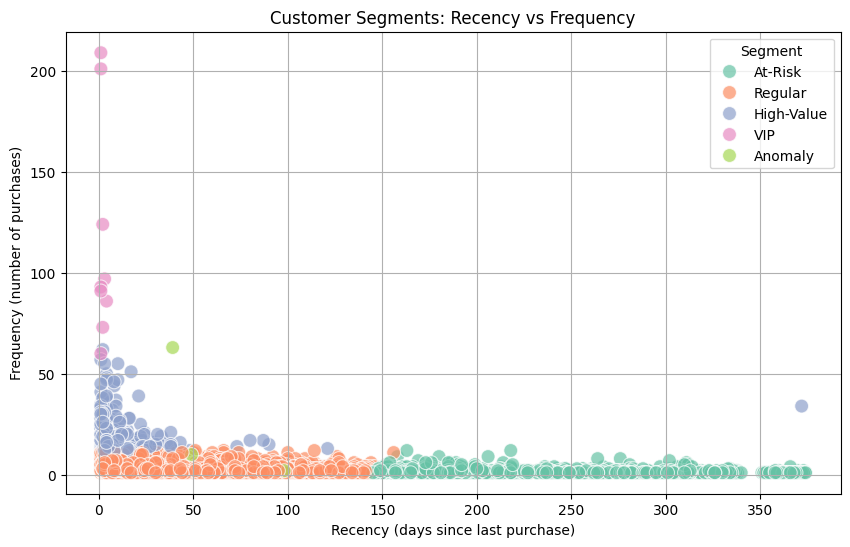

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm,
    x='Recency',
    y='Frequency',
    hue='Segment',
    palette='Set2',
    s=100,
    alpha=0.7
)
plt.title('Customer Segments: Recency vs Frequency')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Frequency (number of purchases)')
plt.legend(title='Segment')
plt.grid()
plt.show()

* 3D Scatter Plot: Recency vs Frequency vs Monetary

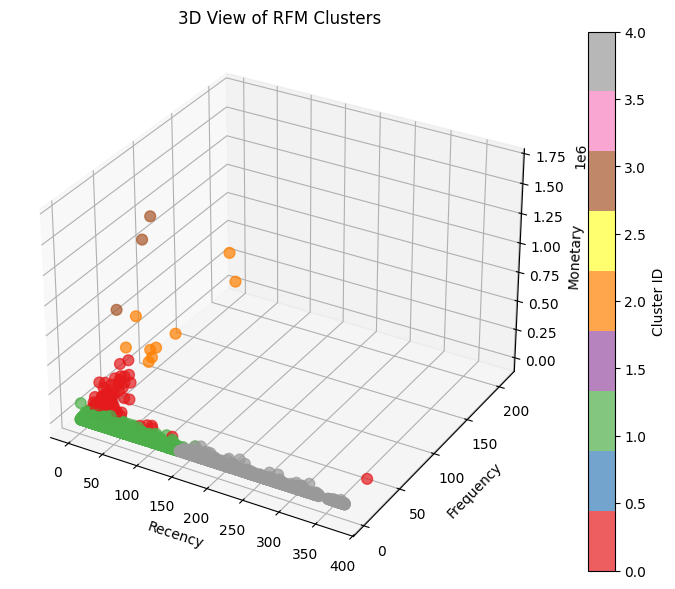

In [55]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    rfm['Recency'],
    rfm['Frequency'],
    rfm['Monetary'],
    c=rfm['Cluster'],
    cmap='Set1',
    s=60,
    alpha=0.7
)

ax.set_title('3D View of RFM Clusters')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.colorbar(scatter, label='Cluster ID')
plt.show()

***Observations:***
1. These 2 scatter plots show the clusters visually.

***6. Saving the K-Means Model***

In [57]:
import joblib

# Saving the K-Means model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Saving StandardScaler
joblib.dump(scaler, 'scaler.pkl')

# Saving the custer label dict
joblib.dump(cluster_labels, 'cluster_labels.pkl')

['cluster_labels.pkl']

# **5. Product Recommendation using Collaborative Filtering**

***Goal:***

Recommend products similar to a given product using cosine similarity of purchase patterns.

***1. Creating the Customer-Product Matrix***

In [58]:
# Creating customer-product matrix
customer_product_matrix = df_clean.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

***2. Computing Cosine Similarity Between Products***

In [60]:
# Transposing to get StockCode × Customer matrix
product_customer_matrix = customer_product_matrix.T

# Computing cosine similarity between products
product_similarity = cosine_similarity(product_customer_matrix)

# Wraping into a DataFrame for easy lookup
similarity_df = pd.DataFrame(
    product_similarity,
    index=product_customer_matrix.index,
    columns=product_customer_matrix.index
)

***3. Building the Recommendation Function***

In [62]:
def get_similar_products(product_code, top_n=5):
    if product_code not in similarity_df.columns:
        return f"❌ Product code {product_code} not found."
    similar_items = similarity_df[product_code].sort_values(ascending=False)[1:top_n+1]
    return similar_items

***4. Example usage***

In [63]:
get_similar_products('85123A')

StockCode
21175    0.749457
21733    0.658728
82552    0.643888
82551    0.642474
23288    0.630984
Name: 85123A, dtype: float64

***5. Creating a StockCode-Description Mapping***

In [64]:
# Build a mapping from StockCode to product Description
product_names = df_clean[['StockCode', 'Description']].drop_duplicates()
product_names = product_names.dropna()
product_names = product_names.set_index('StockCode')['Description']

***6. Improving the recommendation Function with Names***

In [65]:
def get_similar_product_names(product_code, top_n=5):
    if product_code not in similarity_df.columns:
        return f"❌ Product code {product_code} not found."
    
    similar_items = similarity_df[product_code].sort_values(ascending=False)[1:top_n+1]
    
    result = []
    for code, score in similar_items.items():
        name = product_names.get(code, "Unknown Product")
        result.append((code, name, round(score, 3)))
    
    return result

***7. Example Usage***

In [66]:
for code, name, score in get_similar_product_names('85123A'):
    print(f"{code} → {name} (Similarity: {score})")

21175 → StockCode
21175      GIN + TONIC DIET METAL SIGN
21175    GIN AND TONIC DIET METAL SIGN
Name: Description, dtype: object (Similarity: 0.749)
21733 → RED HANGING HEART T-LIGHT HOLDER (Similarity: 0.659)
82552 → WASHROOM METAL SIGN (Similarity: 0.644)
82551 → LAUNDRY 15C METAL SIGN (Similarity: 0.642)
23288 → GREEN VINTAGE SPOT BEAKER (Similarity: 0.631)


***8. Saving the Similarity matrix/ product names***

In [67]:
# Save similarity matrix
joblib.dump(similarity_df, 'similarity_df.pkl')

# Save product name mapping
joblib.dump(product_names, 'product_names.pkl')

['product_names.pkl']